In [118]:
from sklearn import svm,linear_model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

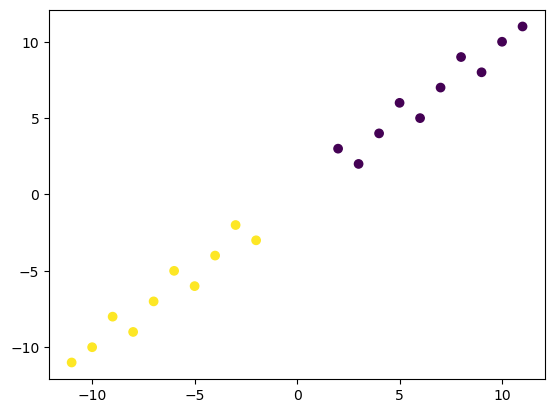

In [119]:
# x = np.array([[1,2],[2,1],[3,5],[3,4],[7,5],[20,7],[20,15],[18,17],[19,19],[12,5]])
# y = np.array([0,0,0,0,0,1,1,1,1,1])



x = np.array(
    [[2, 3], [3, 2], [4, 4], [5, 6], [6, 5], [7, 7], [8, 9], [9, 8], [10, 10], [11, 11],
     [-2, -3], [-3, -2], [-4, -4], [-5, -6], [-6, -5], [-7, -7], [-8, -9], [-9, -8], [-10, -10], [-11, -11]]
     )

y = np.array(
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
     )



plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis')
plt.show()

In [120]:
# svm
svm_instance = svm.SVC(kernel='linear')

In [121]:
svm_instance.fit(x,y)

SVC(kernel='linear')

In [122]:
predictions_svm = svm_instance.predict(x)

In [123]:
# Logistic Regression
logr= linear_model.LogisticRegression()
logr.fit(x,y)

predictions_logr = logr.predict(x)

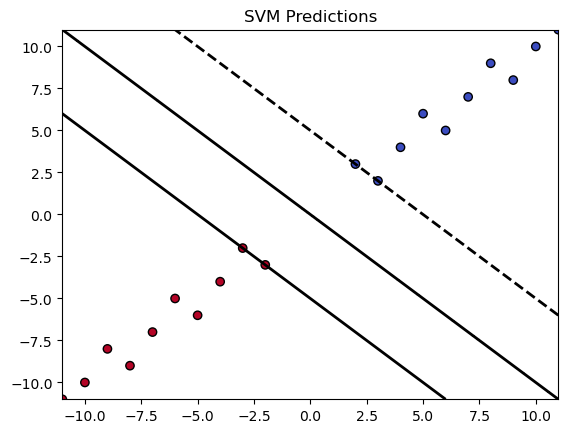

In [124]:
# Visualization

# creating a mesh grid
xx , yy = np.meshgrid(
    np.linspace(x[:,0].min() , x[:,0].max(), 100),
    np.linspace(x[:,1].min() ,x[:,1].max(),100)
)

Z = svm_instance.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(x[:,0],x[:,1],c=predictions_svm,cmap = 'coolwarm', edgecolors = 'k', marker='o')
plt.contour(xx,yy,Z,levels=[-1,0,1],linewidths = 2, colors = 'black')

plt.title("SVM Predictions")
plt.show()



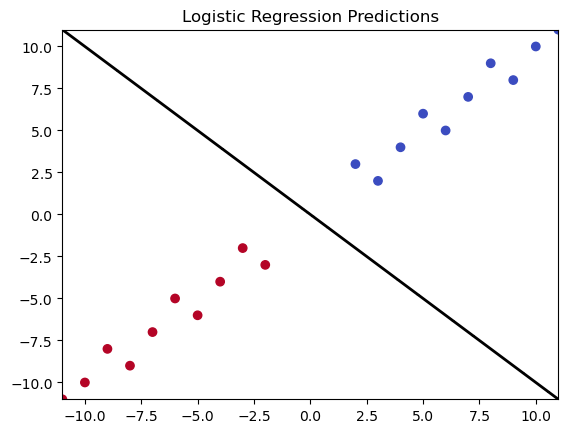

In [125]:
plt.scatter(x[:,0],x[:,1],c=predictions_logr,cmap = 'coolwarm')
plt.title("Logistic Regression Predictions")

xx , yy = np.meshgrid(
    np.linspace(x[:,0].min() , x[:,0].max(), 100),
    np.linspace(x[:,1].min() ,x[:,1].max(),100)
)
Z = logr.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black')

plt.show()

In [126]:
# Accuracy for the given dataset

print("Support Vector Machines: ",accuracy_score(predictions_svm,y))
print("Logistic Regression: ",accuracy_score(predictions_logr,y))

Support Vector Machines:  1.0
Logistic Regression:  1.0
